In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import pandas as pd
import tensorflow


In [4]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()


In [5]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [6]:
xtrain = pd.DataFrame(xtrain.reshape(60000, 784))
xtest = pd.DataFrame(xtest.reshape(10000, 784))


In [7]:

m = Sequential([

    Dense(units = 64, activation = 'relu',  input_shape = (784,)),
    Dense(units = 10, activation = 'softmax')
])


In [8]:

# build the computation graph
m.compile(optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
          loss=tensorflow.keras.losses.categorical_crossentropy,
          metrics=['accuracy'])

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True))


In [9]:

# print all layers
print(m.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


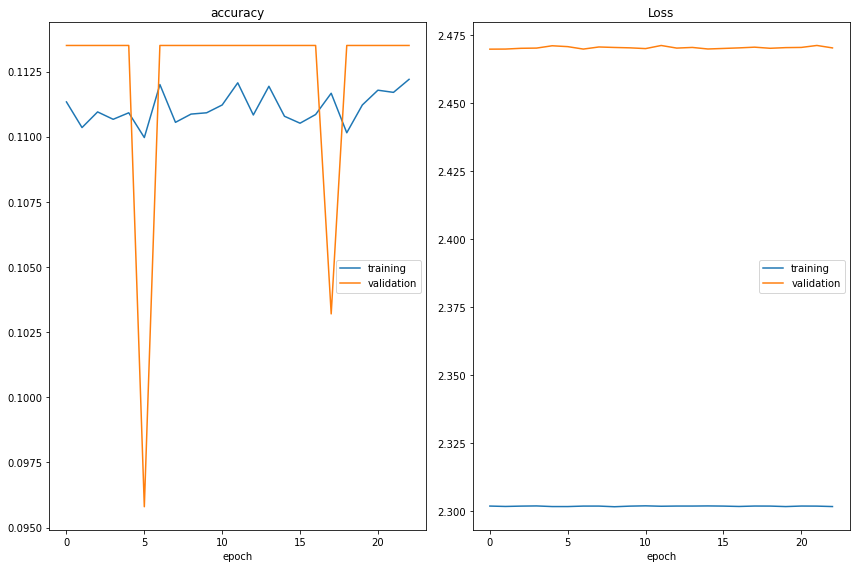

accuracy
	training         	 (min:    0.110, max:    0.112, cur:    0.112)
	validation       	 (min:    0.096, max:    0.113, cur:    0.113)
Loss
	training         	 (min:    2.302, max:    2.302, cur:    2.302)
	validation       	 (min:    2.470, max:    2.471, cur:    2.470)


KeyboardInterrupt: 

In [11]:
from livelossplot.inputs.tf_keras import PlotLossesCallback

# train the model
h  = m.fit(xtrain, ytrain, epochs=50, batch_size=32
           ,validation_data=(xtest, ytest), callbacks=[PlotLossesCallback()], verbose=0
           )


In [30]:

print(h.history['loss'])
print(h.history['val_loss'])

score = m.evaluate(xtrain, ytrain, batch_size=500)
print(score)

# prediction on new data points
pred = m.predict(xtest)


NameError: name 'h' is not defined

In [ ]:

score = m.evaluate(xtest, ytest, batch_size=50)
print(score)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], color="g")
plt.plot(h.history['val_loss'])
plt.show()
plt.plot(h.history['accuracy'], color="g")
plt.plot(h.history['val_accuracy'])


In [ ]:
h.history['loss']